In [2]:
from control.matlab import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

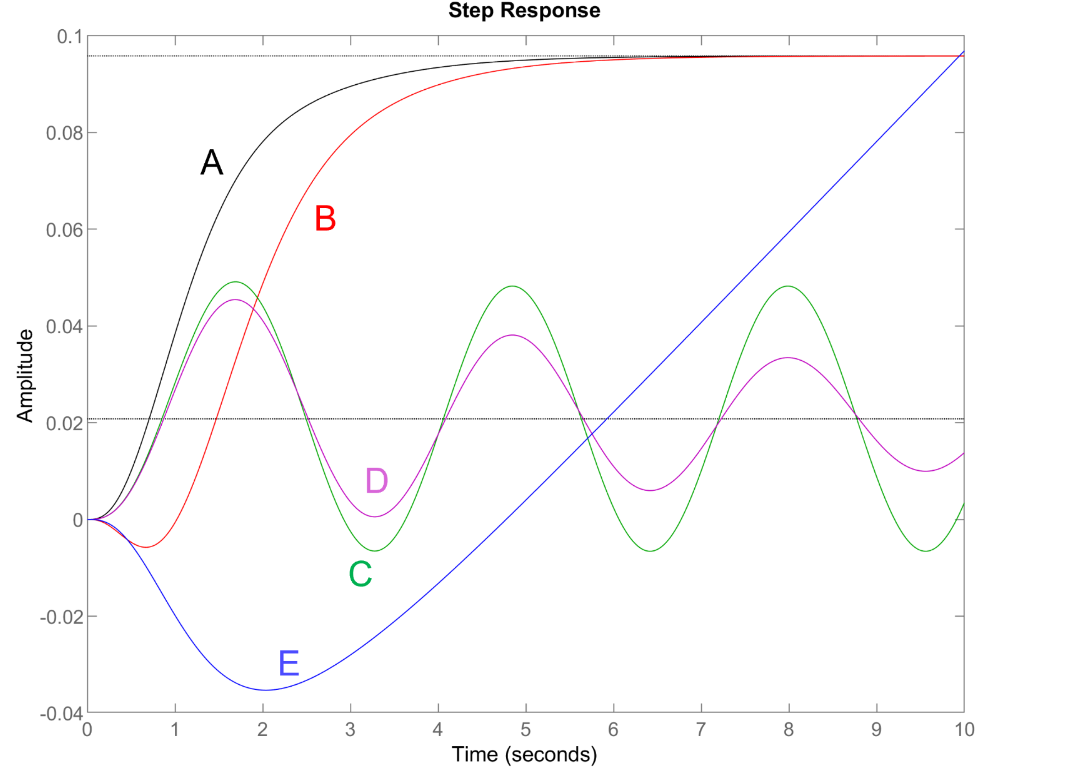

Question A:

Response D: corresponds to H1, smaller maximum and sinusoidal

H3 --> Stable, 4 poles, 1 zero, : (s-20)/(s+1)*(s+3)*(s+2+2i)*(s+2-2i), non minimum phase system, as there is a 0 in the right half plane --> response B
H4 --> Starts at -90, so type 1 system, gain margin is positive, so also unstable, 
H5 --> Starts at 0 phase, so type 0 system, so must be the unstable response E

for non minimum phase system in the bode plot we would need a zero in the right hand plane, this corresponds to a slope of -20 dB/dec, phase changes with -90


H1 max = 0.04890507892179997
H2 max = 0.04912714095490377


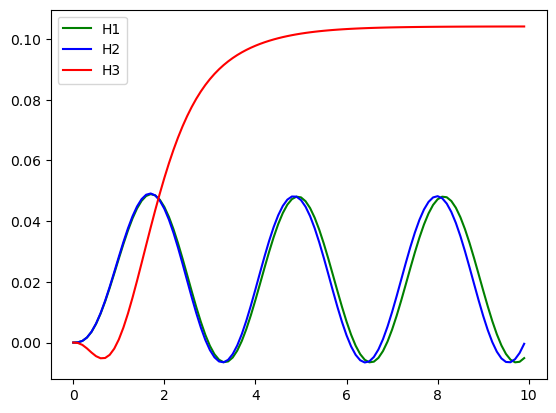

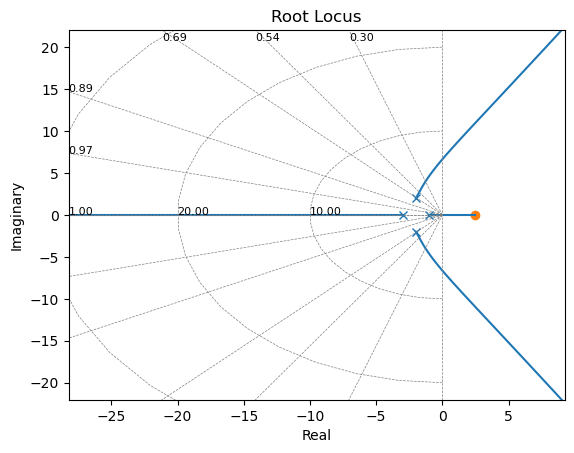

In [8]:
#Define s
s = tf([1,0], [1])

H1 = tf([1,1], [2, 10.4, 20.2, 40, 48.12])
H2 = tf([1,1], [2, 10, 20, 40, 48])
H3 = (s-2.5)/((s+1)*(s+3)*(s*s + 4*s + 8))

t = np.arange(0, 10, 0.1)

y1, t = step(H1, t)
y2, t= step(H2, t)
y3, t = step(-H3, t)

plt.figure()
plt.plot(t, y1, color = "green", label ="H1") #H1 is green
plt.plot(t, y2, color = "blue", label ="H2") #H2 is blue
plt.plot(t, y3, color ="red", label = "H3") #H3 is red
plt.legend()

print("H1 max =", max(y1))
print("H2 max =", max(y2))

plt.figure()
rlocus(H3)
plt.show()

Reconstruct transfer function from bode plot, 

gain is -20, as the graph is clearly shifted up
furthermore, at T =1, there is a first order lag, so transfr function looks like : -20/s+1

apply final value theorem (lim s-->0)*s with step input (1/2) and find that the left over value is -20


QUESTION 2

a) 0 Phase for W=0, -270 phase for w = oo
    Gain is less than zero for w = 0, so gain should be on negative side in decibels

b) its the limit of jw*1/jw * 1/(1+H(jw))  with jw-->0
    since, H(jw) goes to 0.5^1/2 (from polar plot), this limit is equal to 0.585786

c) system B is type one, so will have a zero error to a step response, step response of 3 means that the system will move to 3

d) type 2 system, so 2 poles in the origin

QUESTION 3

In [19]:
#Define s & K
s = tf([1,0],[1])
K = 64

#Define tf H(s)
H_ol = 3/((s+6.2)*(s-3.1))
print(H_ol)


H_cl = K*H_ol.feedback(1)
print(H_cl)


         3
-------------------
s^2 + 3.1 s - 19.22


        192
-------------------
s^2 + 3.1 s - 16.22



In [24]:
#Time Vector
t = np.arange(0, 10, 0.1)

#Responses
y_ol, t = step(H_ol, t)
y_cl, t = step(H_cl, t)

plt.figure()
#plt.plot(t, y_ol, label = "Open Loop")
plt.plot(t, y_cl, label = "Closed Loop")
plt.legend()
plt.show()


In [25]:
#Root Locus Plots

plt.figure()
sisotool(64*H_ol)
plt.show()

plt.figure()
rlocus(H_ol)
plt.show()


QUESTION 4

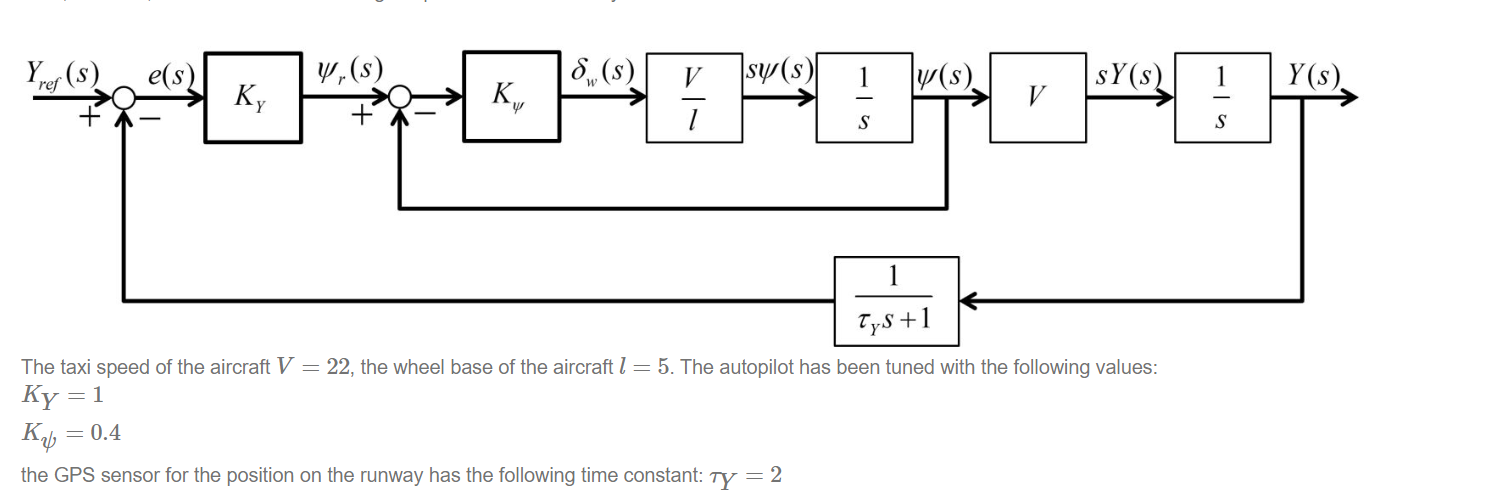

In [32]:
#Constants
s = tf([1,0],[1])
V = 22
l = 5
tau = 2
Ky = 1
Kphi = 0.4


#Inner Loop
I_ol = Kphi*(V/l)*(1/s)
I_cl = I_ol.feedback(1)

print(I_ol)
print(I_cl)

#Outer Loop
O_ol = Ky*I_cl*V*(1/s)
print(O_ol)
O_cl = O_ol.feedback(1/(tau*s + 1))
print(O_cl)



1.76
----
 s


  1.76
--------
s + 1.76


   38.72
------------
s^2 + 1.76 s


         77.44 s + 38.72
---------------------------------
2 s^3 + 4.52 s^2 + 1.76 s + 38.72



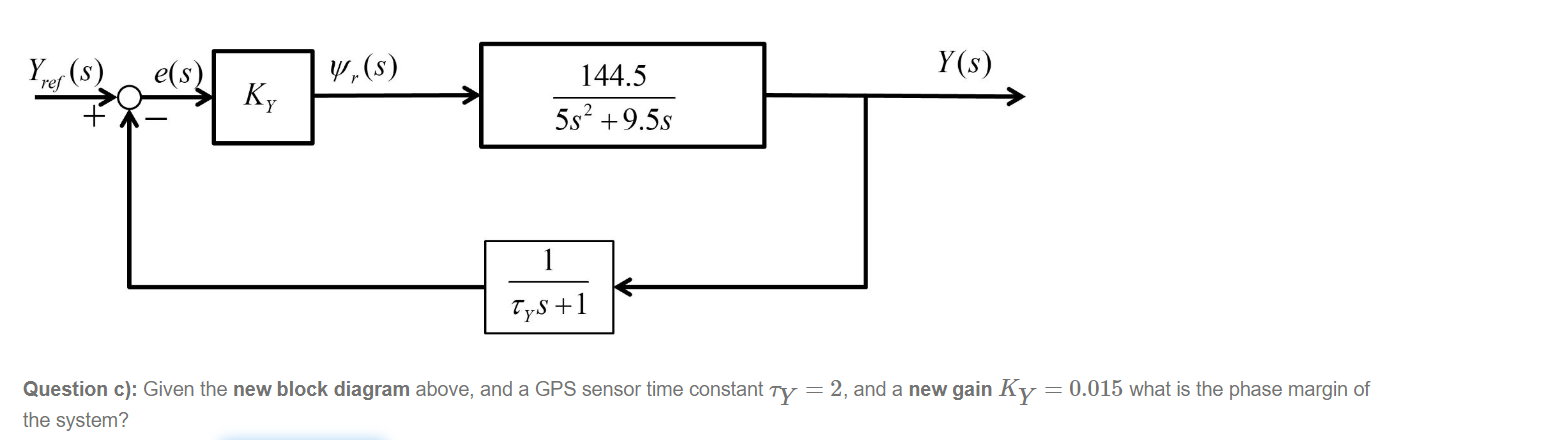

In [49]:
s = tf([1,0],[1])
Ky = 0.015
tau = 0.2

Y_ol = Ky*144.5*(1/(5*s*s + 9.5*s))*(1/(tau*s + 1))

gm, pm, wcg, wcp = margin(Y_ol)


print("Phase Margin =", pm)

plt.figure()
sisotool(Y_ol)
plt.show()

Phase Margin = 80.61532185409993


In [50]:
t = np.arange(0,25,0.1)

Ky = 0.015
tau = 0.2

Y_ol = Ky*144.5*(1/(5*s*s + 9.5*s))
Y_cl = Y_ol.feedback(1/(tau*s + 1))
print(tau, stepinfo(Y_cl))
print(damp(Y_cl))



tau = 2
Y_ol = Ky*144.5*(1/(5*s*s + 9.5*s))
Y_cl = Y_ol.feedback(1/(tau*s + 1))
print(tau, stepinfo(Y_cl))
print(damp(Y_cl))

0.2 {'RiseTime': 7.906384339443742, 'SettlingTime': 14.510540670037928, 'SettlingMin': 0.9000519247097972, 'SettlingMax': 1.0, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.9987648192855632, 'PeakTime': 24.27725073640961, 'SteadyStateValue': 1.0}
_____Eigenvalue______ Damping___ Frequency_
    -5.131                     1      5.131
    -1.485                     1      1.485
   -0.2845                     1     0.2845
(array([5.13075938, 1.48470448, 0.28453614]), array([1., 1., 1.]), array([-5.13075938+0.j, -1.48470448+0.j, -0.28453614+0.j]))
2 {'RiseTime': 4.6179074797395225, 'SettlingTime': 16.512517654826173, 'SettlingMin': 0.9042737509900952, 'SettlingMax': 1.0995536261109433, 'Overshoot': 9.955362611094332, 'Undershoot': 0, 'Peak': 1.0995536261109433, 'PeakTime': 10.075434501249868, 'SteadyStateValue': 1.0}
_____Eigenvalue______ Damping___ Frequency_
    -1.974                     1      1.974
   -0.2128    +0.254j     0.6422     0.3313
   -0.2128    -0.254j     0.6422     0.3313
(a

QUESTION 5

In [70]:
Kp = 1
Kd = 19

D = Kp*(1 + (Kd/Kp)*s)

theta_ol = D*(1.4/(s*s))*(2/(s+2))

gm, pm, wcg, wcp = margin(theta_ol)
print("Phase Margin =", pm)

plt.figure()
bode(theta_ol, dB=True)
plt.show()

mag, phase, omega = bode(theta_ol, dB=True, deg = True)


print("Max Phase Margin =", 180+max(phase))

#print(phase == max(phase))

g = mag[phase == max(phase)]
w = omega[phase == max(phase)]
print("Gain at Max Phase in dB =", g)
print("Omega at max phase =", w)

Phase Margin = 15.189202292135633
Max Phase Margin = 178.10756239861288
Gain at Max Phase in dB = [82.11137321]
Omega at max phase = [0.32397426]


In [75]:
Kp = 0.01
Kd = 0.14

D = Kp*(1+(Kd/Kp)*s)
sat = 1.4/s**2
sensor = 2/(s+2)

feedforward = sat 
feedback_path = (sat*sensor*D).minreal()

T_theta = feedforward.feedback(feedback_path)
print(T_theta)


       1.4 s^3 + 2.8 s^2
-------------------------------
s^5 + 2 s^4 + 0.5488 s + 0.0392



In [79]:
Kp = 0.01
Kd = 0.14
Ki = 0.0001

D = Kp*(1 + (Kd/Kp)*s + (Ki/(Kp*s)))

feedforward = sat
feedback_path = (sat*sensor*D).minreal()

T_theta = feedforward.feedback(feedback_path)
print(T_theta)

rlocus(D*sat*sensor.minreal())


              1.4 s^4 + 2.8 s^3
----------------------------------------------
s^6 + 2 s^5 + 0.5488 s^2 + 0.0392 s + 0.000392



(array([[-2.        +0.00000000e+00j,  0.        +0.00000000e+00j,
          0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
        [-2.        +0.00000000e+00j,  0.        +0.00000000e+00j,
          0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
        [-2.        +0.00000000e+00j,  0.        +0.00000000e+00j,
          0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
        [-1.95412907+0.00000000e+00j, -0.0172505 -5.18930597e-02j,
         -0.0172505 +5.18930597e-02j, -0.01136993+0.00000000e+00j],
        [-1.90603222+0.00000000e+00j, -0.04114968-6.54347556e-02j,
         -0.04114968+6.54347556e-02j, -0.01166842+0.00000000e+00j],
        [-1.85535035+0.00000000e+00j, -0.06643503-6.86063118e-02j,
         -0.06643503+6.86063118e-02j, -0.01177958+0.00000000e+00j],
        [-1.80161599+0.00000000e+00j, -0.09327312-6.13340096e-02j,
         -0.09327312+6.13340096e-02j, -0.01183776+0.00000000e+00j],
        [-1.72597013+0.00000000e+00j, -0.13107402-3.465

Clicked at    -0.6058  +0.05596j gain      2.445 damp     0.9958


c:\Users\kaspe\anaconda3\lib\site-packages\control\rlocus.py:649: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax_rlocus.plot(s.real, s.imag, 'k.', marker='s', markersize=8,


Clicked at    -0.4716  +0.07927j gain      2.173 damp     0.9862
Clicked at    -0.2619   -0.0373j gain      1.574 damp       0.99
Clicked at    -0.1739 +0.009326j gain      1.321 damp     0.9986
Clicked at    -0.1194 +0.009326j gain      1.259 damp      0.997
Clicked at     -1.025  -0.01399j gain      2.739 damp     0.9999
Clicked at     -1.189   +0.1026j gain      2.643 damp     0.9963
Clicked at     -1.545  +0.03264j gain      1.882 damp     0.9998
Clicked at    -0.9665    -1.343j gain      7.333 damp     0.5841
Clicked at    -0.9665    -1.133j gain       6.01 damp     0.6489
Clicked at    -0.9665   -0.7834j gain      4.305 damp     0.7768
Clicked at    -0.9665   -0.5502j gain      3.515 damp      0.869
Clicked at    -0.9665   -0.2238j gain      2.876 damp     0.9742
Clicked at    -0.9665   -0.3637j gain      3.083 damp     0.9359
Clicked at    -0.9748   -0.2705j gain      2.933 damp     0.9636
Clicked at    -0.9748   -0.2938j gain      2.967 damp     0.9575
Clicked at    -0.9614   -